# Handling Dates - Pandas 

[Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv)

In [1]:
import pandas as pd

In [4]:
dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

In [8]:
df = pd.read_csv(dataset_url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [9]:
df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
df.set_index(keys='Date', inplace=True, drop = True)
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
df.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

# Data Access

In [15]:
df.loc['1959-01']

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [16]:
df.loc['1959-01'].mean()

Births    39.129032
dtype: float64

In [17]:
# From and to date range
df.loc["1959-01":"1959-03"]

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-03-27,56
1959-03-28,36
1959-03-29,32


# Resampling

In [19]:
# Average Births on Per month
df.Births.resample('M').mean()

Date
1959-01-31    39.129032
1959-02-28    41.000000
1959-03-31    39.290323
1959-04-30    39.833333
1959-05-31    38.967742
1959-06-30    40.400000
1959-07-31    41.935484
1959-08-31    43.580645
1959-09-30    48.200000
1959-10-31    44.129032
1959-11-30    45.000000
1959-12-31    42.387097
Freq: M, Name: Births, dtype: float64

In [24]:
# Total Births on Per month
df.Births.resample('M').sum()

# df.Births.resample('M').count()
# df.Births.resample('M').min()
# df.Births.resample('M').max()

Date
1959-01-31    55
1959-02-28    52
1959-03-31    56
1959-04-30    58
1959-05-31    55
1959-06-30    59
1959-07-31    57
1959-08-31    64
1959-09-30    73
1959-10-31    59
1959-11-30    59
1959-12-31    55
Freq: M, Name: Births, dtype: int64

# Plotting

<AxesSubplot:xlabel='Date'>

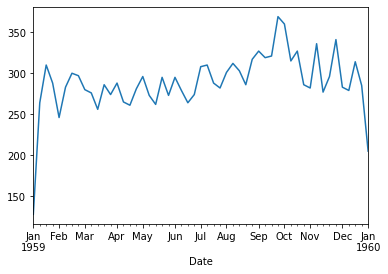

In [26]:
df.Births.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

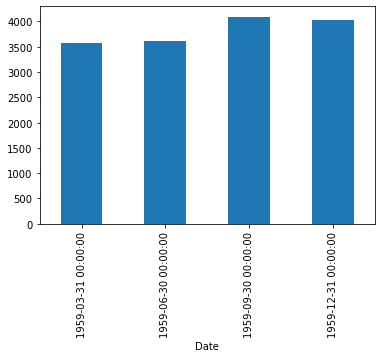

In [28]:
df.Births.resample('Q').sum().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

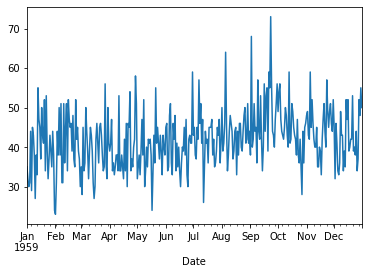

In [29]:
df.Births.plot()

# Data Range

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [31]:
pd.date_range(start="28-06-1992", end="27-06-2022", freq='D')

DatetimeIndex(['1992-06-28', '1992-06-29', '1992-06-30', '1992-07-01',
               '1992-07-02', '1992-07-03', '1992-07-04', '1992-07-05',
               '1992-07-06', '1992-07-07',
               ...
               '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-21',
               '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25',
               '2022-06-26', '2022-06-27'],
              dtype='datetime64[ns]', length=10957, freq='D')

In [37]:
df = pd.read_csv(dataset_url)
df.head(1)

,Date,Births
0,1959-01-01,35


In [38]:
dt_rage = pd.date_range(start="01-01-1959", end="12-31-1959", freq='D')
df.set_index(dt_rage, inplace=True)
df.head()

,Date,Births
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


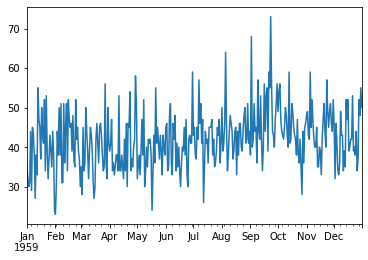

In [40]:
df.Births.plot();

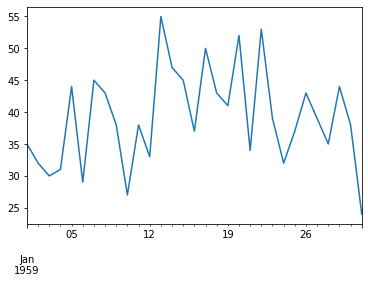

In [41]:
df.loc["1959-01"].Births.plot();

In [42]:
df.asfreq("D")

,Date,Births
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
...,...,...
1959-12-27,1959-12-27,37
1959-12-28,1959-12-28,52
1959-12-29,1959-12-29,48
1959-12-30,1959-12-30,55


In [43]:
df.asfreq("D", method='pad')

,Date,Births
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
...,...,...
1959-12-27,1959-12-27,37
1959-12-28,1959-12-28,52
1959-12-29,1959-12-29,48
1959-12-30,1959-12-30,55


In [45]:
df.asfreq("W", method='pad')

,Date,Births
1959-01-04,1959-01-04,31
1959-01-11,1959-01-11,38
1959-01-18,1959-01-18,43
1959-01-25,1959-01-25,37
1959-02-01,1959-02-01,23
1959-02-08,1959-02-08,31
1959-02-15,1959-02-15,52
1959-02-22,1959-02-22,35
1959-03-01,1959-03-01,35
1959-03-08,1959-03-08,39


In [46]:
# Fill the missing values with a method
df.asfreq("B", method='pad')

,Date,Births
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
...,...,...
1959-12-25,1959-12-25,44
1959-12-28,1959-12-28,52
1959-12-29,1959-12-29,48
1959-12-30,1959-12-30,55


In [51]:
# pd.date_range(start="01-01-1959", end="12-31-1959", freq='D', periods=10) # Casuses Error
pd.date_range(start="01-01-1959", freq='D', periods=10)
pd.date_range(start="01-01-1959", freq='B', periods=10) # Business day frequency
pd.date_range(start="01-01-1959", freq='H', periods=10)

DatetimeIndex(['1959-01-01 00:00:00', '1959-01-01 01:00:00',
               '1959-01-01 02:00:00', '1959-01-01 03:00:00',
               '1959-01-01 04:00:00', '1959-01-01 05:00:00',
               '1959-01-01 06:00:00', '1959-01-01 07:00:00',
               '1959-01-01 08:00:00', '1959-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
pd.date_range(start="01-01-1959",periods=10) 

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10'],
              dtype='datetime64[ns]', freq='D')

# Handling Holidays

In [53]:
# For US Holiday calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [54]:
start_date = "2022-02-02"
end_date = "2023-03-31"

In [59]:
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [60]:
pd.date_range(start=start_date, end=end_date,freq=usb)

DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-14', '2022-02-15',
               ...
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', length=292, freq='C')

In [68]:
# for custome calendar: for eg, india calendar
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday, sunday_to_monday

In [62]:
class indiaCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Independance Day", month=8, day=15)
    ]

In [63]:
ind_cal = CustomBusinessDay(calendar=indiaCalendar())
ind_cal

<CustomBusinessDay>

In [65]:
start_date = "2022-08-10"
end_date = "2022-08-31"
pd.date_range(start_date, end_date, freq=ind_cal)

DatetimeIndex(['2022-08-10', '2022-08-11', '2022-08-12', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='C')

In [71]:
class indiaCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Independance Day", month=8, day=15, observance=sunday_to_monday,)
    ]
    


start_date = "2022-08-10"
end_date = "2022-08-31"

# Excluding the independence day and including all week days
ind_cal = CustomBusinessDay(calendar=indiaCalendar(), weekmask= 'Mon Tue Wed Thu Fri Sat Sun')
pd.date_range(start_date, end_date, freq=ind_cal)

DatetimeIndex(['2022-08-10', '2022-08-11', '2022-08-12', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='C')

In [72]:
# Excluding the independence day and week ends
ind_cal = CustomBusinessDay(calendar=indiaCalendar())
pd.date_range(start_date, end_date, freq=ind_cal)

DatetimeIndex(['2022-08-10', '2022-08-11', '2022-08-12', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='C')

In [73]:
# Excluding the independence day and every Thursday Friday
ind_cal = CustomBusinessDay(calendar=indiaCalendar(), weekmask= 'Mon Tue Wed  Sat Sun')
pd.date_range(start_date, end_date, freq=ind_cal)

DatetimeIndex(['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-16',
               '2022-08-17', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='C')

In [74]:
# Excluding every Thursday Friday
ind_cal = CustomBusinessDay(weekmask='Mon Tue Wed  Sat Sun')
pd.date_range(start_date, end_date, freq=ind_cal)

DatetimeIndex(['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-27',
               '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', freq='C')

# Pandas To Datetime

In [76]:
start_date, type(start_date)

('2022-08-10', str)

In [86]:
dates = ['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17']
pd.to_datetime(dates)

DatetimeIndex(['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17'],
              dtype='datetime64[ns]', freq=None)

In [90]:

dates = ['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17', 'abc']
# Raises error
# pd.to_datetime(dates)
pd.to_datetime(dates, errors='ignore')
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2022-08-10', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17',        'NaT'],
              dtype='datetime64[ns]', freq=None)

In [91]:
pd.to_datetime(start_date, dayfirst=True)

Timestamp('2022-08-10 00:00:00')

In [97]:
t = 1642677825
pd.to_datetime(t, unit='s')
dts = pd.to_datetime([t], unit='s')
dts

DatetimeIndex(['2022-01-20 11:23:45'], dtype='datetime64[ns]', freq=None)

In [101]:
print(dts.view())
print(dts.view('int64'))

DatetimeIndex(['2022-01-20 11:23:45'], dtype='datetime64[ns]', freq=None)
[1642677825000000000]


# Period and PeriodIndex

In [103]:
y = pd.Period("2016")
print(y)
print(y.start_time)
print(y.end_time)

2016
2016-01-01 00:00:00
2016-12-31 23:59:59.999999999


In [106]:
m = pd.Period('2011-1', freq='M')
print(m)
print(m.start_time)
print(m.end_time)
print(m+1)

2011-01
2011-01-01 00:00:00
2011-01-31 23:59:59.999999999
2011-02


In [108]:
d = pd.Period("2021-02-28", freq = "D")
print(d)
print(d+1)

2021-02-28
2021-03-01


In [112]:
h = pd.Period("2021-02-28 23:00:00", freq = "H")
print(h)
print(h+1)
print(h-3)
print(h+pd.offsets.Hour(3))

2021-02-28 23:00
2021-03-01 00:00
2021-02-28 20:00
2021-03-01 02:00


In [114]:
q = pd.Period("2021Q1")
print(q)
print(q+1)

2021Q1
2021Q2


In [118]:
wal = pd.Period("2021Q1", freq="Q-JAN")
print(wal)
print(wal.start_time)
print(wal.end_time)

2021Q1
2020-02-01 00:00:00
2020-04-30 23:59:59.999999999


In [120]:
idx = pd.period_range("2010","2021", freq="M")
idx

PeriodIndex(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
             '2010-07', '2010-08', '2010-09', '2010-10',
             ...
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01'],
            dtype='period[M]', length=133, freq='M')

In [121]:
idx = pd.period_range("2010","2021", freq="Q")
idx

PeriodIndex(['2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1', '2011Q2',
             '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
             '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
             '2020Q3', '2020Q4', '2021Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [122]:
idx = pd.period_range("2010","2021", freq="Q-JAN")
idx

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
             '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3',
             '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1',
             '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3',
             '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3',
             '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1',
             '2021Q2', '2021Q3', '2021Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [124]:
idx = pd.period_range("2010", periods=5, freq="Q-JAN")
idx

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

## Generate random series Period index

In [125]:
import numpy as np
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2010Q4    0.829026
2011Q1   -0.595841
2011Q2    1.586905
2011Q3   -0.104851
2011Q4   -1.514823
Freq: Q-JAN, dtype: float64

In [126]:
ps.index

PeriodIndex(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4'], dtype='period[Q-JAN]', freq='Q-JAN')

In [127]:
ps['2011']

2011Q4   -1.514823
Freq: Q-JAN, dtype: float64

In [129]:
pst = ps.to_timestamp()
pst.index

DatetimeIndex(['2009-11-01', '2010-02-01', '2010-05-01', '2010-08-01',
               '2010-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [130]:
pst.to_period()

2009Q4    0.829026
2010Q1   -0.595841
2010Q2    1.586905
2010Q3   -0.104851
2010Q4   -1.514823
Freq: Q-DEC, dtype: float64

## Walmart Data

In [131]:
data_url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/18_ts_period/wmt.csv"

In [132]:
df = pd.read_csv(data_url)
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [133]:
df.set_index('Line Item', inplace=True)
df

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [134]:
df.T

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [137]:
df2 = df.T.copy()
df2.index = pd.PeriodIndex(df2.index, freq='Q-JAN')
df2.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [141]:
df2['start date'] = df2.index.map(lambda x: x.start_time)
df2['end date'] = df2.index.map(lambda x: x.end_time)
df2

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


# Timezones

In [143]:
data_url = "https://raw.githubusercontent.com/codebasics/py/master/pandas/19_ts_timezone/msft.csv"
df = pd.read_csv(data_url, header=1, index_col='Date Time',parse_dates=True)
df

,Price
Date Time,
2017-08-17 09:00:00,72.38
2017-08-17 09:15:00,71.00
2017-08-17 09:30:00,71.67
2017-08-17 10:00:00,72.80
2017-08-17 10:30:00,73.00
2017-08-17 11:00:00,72.50


In [144]:
df.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [146]:
df.tz_localize(tz='US/Eastern')

,Price
Date Time,
2017-08-17 09:00:00-04:00,72.38
2017-08-17 09:15:00-04:00,71.00
2017-08-17 09:30:00-04:00,71.67
2017-08-17 10:00:00-04:00,72.80
2017-08-17 10:30:00-04:00,73.00
2017-08-17 11:00:00-04:00,72.50


In [147]:
df = df.tz_localize(tz='US/Eastern')
df.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [148]:
df = df.tz_convert(tz='Europe/Berlin')
df.index

DatetimeIndex(['2017-08-17 15:00:00+02:00', '2017-08-17 15:15:00+02:00',
               '2017-08-17 15:30:00+02:00', '2017-08-17 16:00:00+02:00',
               '2017-08-17 16:30:00+02:00', '2017-08-17 17:00:00+02:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='Date Time', freq=None)

In [149]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [150]:
df = df.tz_convert(tz='Asia/Calcutta')
df

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


In [151]:
df.index.tz_convert(tz='Asia/Calcutta')

DatetimeIndex(['2017-08-17 18:30:00+05:30', '2017-08-17 18:45:00+05:30',
               '2017-08-17 19:00:00+05:30', '2017-08-17 19:30:00+05:30',
               '2017-08-17 20:00:00+05:30', '2017-08-17 20:30:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date Time', freq=None)

In [153]:
# rng = pd.date_range(start=start_date, periods=10, freq='H')
rng = pd.date_range(start=start_date, periods=10, freq='H', tz='Asia/Calcutta')
rng

DatetimeIndex(['2022-08-10 00:00:00+05:30', '2022-08-10 01:00:00+05:30',
               '2022-08-10 02:00:00+05:30', '2022-08-10 03:00:00+05:30',
               '2022-08-10 04:00:00+05:30', '2022-08-10 05:00:00+05:30',
               '2022-08-10 06:00:00+05:30', '2022-08-10 07:00:00+05:30',
               '2022-08-10 08:00:00+05:30', '2022-08-10 09:00:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', freq='H')

In [158]:
rng = pd.date_range(start_date, periods=30, freq="20min")
s = pd.Series(range(30), index=rng)
s

2022-08-10 00:00:00     0
2022-08-10 00:20:00     1
2022-08-10 00:40:00     2
2022-08-10 01:00:00     3
2022-08-10 01:20:00     4
2022-08-10 01:40:00     5
2022-08-10 02:00:00     6
2022-08-10 02:20:00     7
2022-08-10 02:40:00     8
2022-08-10 03:00:00     9
2022-08-10 03:20:00    10
2022-08-10 03:40:00    11
2022-08-10 04:00:00    12
2022-08-10 04:20:00    13
2022-08-10 04:40:00    14
2022-08-10 05:00:00    15
2022-08-10 05:20:00    16
2022-08-10 05:40:00    17
2022-08-10 06:00:00    18
2022-08-10 06:20:00    19
2022-08-10 06:40:00    20
2022-08-10 07:00:00    21
2022-08-10 07:20:00    22
2022-08-10 07:40:00    23
2022-08-10 08:00:00    24
2022-08-10 08:20:00    25
2022-08-10 08:40:00    26
2022-08-10 09:00:00    27
2022-08-10 09:20:00    28
2022-08-10 09:40:00    29
Freq: 20T, dtype: int64

In [159]:
b = s.tz_localize(tz='Europe/Berlin')
b

2022-08-10 00:00:00+02:00     0
2022-08-10 00:20:00+02:00     1
2022-08-10 00:40:00+02:00     2
2022-08-10 01:00:00+02:00     3
2022-08-10 01:20:00+02:00     4
2022-08-10 01:40:00+02:00     5
2022-08-10 02:00:00+02:00     6
2022-08-10 02:20:00+02:00     7
2022-08-10 02:40:00+02:00     8
2022-08-10 03:00:00+02:00     9
2022-08-10 03:20:00+02:00    10
2022-08-10 03:40:00+02:00    11
2022-08-10 04:00:00+02:00    12
2022-08-10 04:20:00+02:00    13
2022-08-10 04:40:00+02:00    14
2022-08-10 05:00:00+02:00    15
2022-08-10 05:20:00+02:00    16
2022-08-10 05:40:00+02:00    17
2022-08-10 06:00:00+02:00    18
2022-08-10 06:20:00+02:00    19
2022-08-10 06:40:00+02:00    20
2022-08-10 07:00:00+02:00    21
2022-08-10 07:20:00+02:00    22
2022-08-10 07:40:00+02:00    23
2022-08-10 08:00:00+02:00    24
2022-08-10 08:20:00+02:00    25
2022-08-10 08:40:00+02:00    26
2022-08-10 09:00:00+02:00    27
2022-08-10 09:20:00+02:00    28
2022-08-10 09:40:00+02:00    29
dtype: int64

In [160]:
m = s.tz_localize(tz='Asia/Calcutta')
m

2022-08-10 00:00:00+05:30     0
2022-08-10 00:20:00+05:30     1
2022-08-10 00:40:00+05:30     2
2022-08-10 01:00:00+05:30     3
2022-08-10 01:20:00+05:30     4
2022-08-10 01:40:00+05:30     5
2022-08-10 02:00:00+05:30     6
2022-08-10 02:20:00+05:30     7
2022-08-10 02:40:00+05:30     8
2022-08-10 03:00:00+05:30     9
2022-08-10 03:20:00+05:30    10
2022-08-10 03:40:00+05:30    11
2022-08-10 04:00:00+05:30    12
2022-08-10 04:20:00+05:30    13
2022-08-10 04:40:00+05:30    14
2022-08-10 05:00:00+05:30    15
2022-08-10 05:20:00+05:30    16
2022-08-10 05:40:00+05:30    17
2022-08-10 06:00:00+05:30    18
2022-08-10 06:20:00+05:30    19
2022-08-10 06:40:00+05:30    20
2022-08-10 07:00:00+05:30    21
2022-08-10 07:20:00+05:30    22
2022-08-10 07:40:00+05:30    23
2022-08-10 08:00:00+05:30    24
2022-08-10 08:20:00+05:30    25
2022-08-10 08:40:00+05:30    26
2022-08-10 09:00:00+05:30    27
2022-08-10 09:20:00+05:30    28
2022-08-10 09:40:00+05:30    29
dtype: int64

In [161]:
b + m

2022-08-09 18:30:00+00:00   NaN
2022-08-09 18:50:00+00:00   NaN
2022-08-09 19:10:00+00:00   NaN
2022-08-09 19:30:00+00:00   NaN
2022-08-09 19:50:00+00:00   NaN
2022-08-09 20:10:00+00:00   NaN
2022-08-09 20:30:00+00:00   NaN
2022-08-09 20:50:00+00:00   NaN
2022-08-09 21:10:00+00:00   NaN
2022-08-09 21:30:00+00:00   NaN
2022-08-09 21:50:00+00:00   NaN
2022-08-09 22:00:00+00:00   NaN
2022-08-09 22:10:00+00:00   NaN
2022-08-09 22:20:00+00:00   NaN
2022-08-09 22:30:00+00:00   NaN
2022-08-09 22:40:00+00:00   NaN
2022-08-09 22:50:00+00:00   NaN
2022-08-09 23:00:00+00:00   NaN
2022-08-09 23:10:00+00:00   NaN
2022-08-09 23:20:00+00:00   NaN
2022-08-09 23:30:00+00:00   NaN
2022-08-09 23:40:00+00:00   NaN
2022-08-09 23:50:00+00:00   NaN
2022-08-10 00:00:00+00:00   NaN
2022-08-10 00:10:00+00:00   NaN
2022-08-10 00:20:00+00:00   NaN
2022-08-10 00:30:00+00:00   NaN
2022-08-10 00:40:00+00:00   NaN
2022-08-10 00:50:00+00:00   NaN
2022-08-10 01:00:00+00:00   NaN
2022-08-10 01:10:00+00:00   NaN
2022-08-

# Shift & lag

In [164]:
dataset_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(dataset_url, parse_dates=['Date'], index_col='Date')
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [166]:
df.shift(2).head()

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,35.0
1959-01-04,32.0
1959-01-05,30.0


In [167]:
df.shift(-2).head()

,Births
Date,
1959-01-01,30.0
1959-01-02,31.0
1959-01-03,44.0
1959-01-04,29.0
1959-01-05,45.0


In [168]:
df['PrevDay'] = df.shift(1)
df.head()

,Births,PrevDay
Date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [169]:
df['Change'] = df['PrevDay'] - df['Births']
df.head()

,Births,PrevDay,Change
Date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,3.0
1959-01-03,30,32.0,2.0
1959-01-04,31,30.0,-1.0
1959-01-05,44,31.0,-13.0


In [172]:
# df['pct rtn 5 dy'] = (df['Births'] - df['Births'].shift(5))*100/df['Births'].shift(5)
df.head(10)

,Births,PrevDay,Change,pct rtn 5 dy
Date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,3.0,NaN
1959-01-03,30,32.0,2.0,NaN
1959-01-04,31,30.0,-1.0,NaN
1959-01-05,44,31.0,-13.0,NaN
1959-01-06,29,44.0,15.0,-17.142857
1959-01-07,45,29.0,-16.0,40.625000
1959-01-08,43,45.0,2.0,43.333333
1959-01-09,38,43.0,5.0,22.580645


In [173]:
df = df[['Births']]
df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [174]:
df.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [178]:
idx = pd.date_range(df.index.min(),periods = len(df), freq = 'B')
idx

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-05', '1959-01-06',
               '1959-01-07', '1959-01-08', '1959-01-09', '1959-01-12',
               '1959-01-13', '1959-01-14',
               ...
               '1960-05-12', '1960-05-13', '1960-05-16', '1960-05-17',
               '1960-05-18', '1960-05-19', '1960-05-20', '1960-05-23',
               '1960-05-24', '1960-05-25'],
              dtype='datetime64[ns]', length=365, freq='B')

In [179]:
df.index = idx
df

,Births
1959-01-01,35
1959-01-02,32
1959-01-05,30
1959-01-06,31
1959-01-07,44
...,...
1960-05-19,37
1960-05-20,52
1960-05-23,48
1960-05-24,55


In [180]:
df.tshift(1)

<ipython-input-180-ddee8c46d442>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(1)


,Births
1959-01-02,35
1959-01-05,32
1959-01-06,30
1959-01-07,31
1959-01-08,44
...,...
1960-05-20,37
1960-05-23,52
1960-05-24,48
1960-05-25,55
